<style>
  body {
    margin: 0;
    padding: 0;
    font-family: Arial, sans-serif;
  }

  /* Linha das logos usando table layout */
  .cover-header {
    display: table;
    width: 100%;
    margin-top: 20px;
    table-layout: fixed;
  }

  .cover-header .left{
    display: table-cell;
    width: 20%;
    vertical-align: middle;
    text-align: center;
  }
  .cover-header .right {
    display: table-cell;
    width: 30%;
    vertical-align: middle;
    text-align: center;
  }

  .cover-header .center {
    display: table-cell;
    width: 50%;
    text-align: center;
    vertical-align: middle;
  }

  .cover-header img {
    max-height: 55px;
    width: auto;
    display: inline-block;
  }

  /* Texto institucional embaixo das logos */
  .cover-center {
    text-align: center;
    margin-top: 20px;
    vertical-align: middle;
  }

  .cover-center p {
    text-align: center;
    vertical-align: middle;
    margin: 0;
    font-weight: 700;
    line-height: 1.4;
    font-size: 16px;
  }

  /* Título e autor */
  .cover-title {
    margin-top: 120px;
    text-align: center;
  }

  .cover-title h1 {
    font-size: 28px;
    margin-bottom: 60px;
  }

  .cover-title .author {
    font-size: 18px;
    margin-top: 160px; /* nome bem mais abaixo */
  }

  /* Rodapé fixo */
  .cover-footer {
    position: absolute;
    bottom: 30px;
    left: 0;
    width: 100%;
    text-align: center;
    font-size: 14px;
  }

  .cover-footer {
  position: absolute;
  bottom: 30px;
  left: 0;
  width: 100%;
  text-align: center;
  font-size: 14px;
}

</style>

<div class="cover-header">
  <div class="left">
    <img src="Imagens/logo_virtus2.png" alt="Logo VIRTUS">
  </div>
  <div class = "center"></div>
  <div class="right">
    <img src="Imagens/logo_ufcg.png" alt="Logo UFCG">
  </div>
</div>

<div class="cover-center">
  <p>
    UNIVERSIDADE FEDERAL DE CAMPINA GRANDE<br>
    CENTRO DE CIÊNCIAS E TECNOLOGIA<br>
    CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁTICA<br>
    CENTRO DE COMPETÊNCIAS EMBRAPII VIRTUS-CC
  </p>
</div>

<div class="cover-title">
  <h1>Filtros digitais</h1>
  <p class="author">Jezrael Pereira Filgueiras</p>
</div>

<div class="cover-footer">
  Campina Grande, 29 de setembro de 2025
</div>

<div style="page-break-after: always;"></div>

<style>
#toc ol {
  counter-reset: item;
  list-style-type: none;
  padding-left: 1.2em;
}
#toc li {
  display: block;
}
#toc li:before {
  content: counters(item, ".") " ";
  counter-increment: item;
}
</style>

<div id="toc">
  <h2>Sumário</h2>
  <ol>
    <li><a href="#1-introdução">Introdução</a></li>
    <li>
      <a href="#2-desenvolvimento">Desenvolvimento</a>
      <ol>
          <li><a href="#21-hamming">Janelas de Hamming</a></li>
          <li><a href="#22-butterworth">Aproximação de Butterworth</a></li>
      </ol>
    </li>
    <li>
      <a href="#3-resultados-e-discussões">Resultados e discussões</a>
      <ol>
        <li><a href="#31-hamming">Janelas de Hamming</a></li>
        <li><a href="#32-butterworth">Aproximação de Butterworth</a></li>
      </ol>
    </li>
    <li><a href="#conclusao">Conclusão</a></li>
    <li><a href="#referencias">Referências</a></li>
  </ol>
</div>

<div style="page-break-after: always;"></div>

<a id="1-introdução"></a>
# 1. Introdução

No processamento digital de sinais, a filtragem é uma das operações mais fundamentais, pois permite modificar seletivamente o conteúdo espectral de um sinal. Através de filtros digitais, é possível atenuar ruídos indesejados, realçar determinadas faixas de frequência ou mesmo separar componentes específicos de um sinal. Esses filtros podem ser classificados em duas grandes categorias: os de resposta finita ao impulso (FIR) e os de resposta infinita ao impulso (IIR).  

Os filtros FIR apresentam como característica principal a estabilidade incondicional e a possibilidade de se obter uma resposta em fase linear, o que é desejável em diversas aplicações. Contudo, em geral, exigem ordens mais elevadas para atingir especificações rígidas, o que implica maior custo computacional. Já os filtros IIR, por explorarem polos em sua função de transferência, conseguem atender a requisitos de seletividade com ordens menores, mas apresentam desafios relacionados à estabilidade e à distorção de fase.  

No contexto deste estudo, são exploradas duas abordagens clássicas de projeto: o método das janelas, utilizando a janela de Hamming para a implementação de um filtro FIR passa‑baixas, e a aproximação de Butterworth para a implementação de um filtro IIR passa‑altas.


<a id="2-desenvolvimento"></a>
# 2. Desenvolvimento

<a id="21-hamming"></a>
## 2.1 Janelas de Hamming

### Função Janela de Hamming

A função janela de Hamming generralizada é definida como:

\begin{equation}
w_H(n) = 
\begin{cases} 
\alpha + (1 - \alpha) \cos\left(\frac{2\pi n}{M}\right), & \text{para } |n| \leq \frac{M}{2}, \\\\
0, & \text{para } |n| > \frac{M}{2}
\end{cases} \tag{2.1}
\end{equation}

Onde $M$ é o comprimento total da janela em número de amostras, e com $0<\alpha<1$. Para $\alpha = 0.54$, essa janela é denominada janela de Hamming,e caso $\alpha = 0.5$, ela recebe o nome de janela de Hann. A resposta em frequência da janela de Hamming generalizada é dada por:

\begin{equation}
W_H(e^{j\omega}) = \alpha W_T(e^{j\omega}) + \left(\frac{1 - \alpha}{2}\right) W_T\left(e^{j(\omega - \frac{2\pi}{N})}\right) + \left(\frac{1 - \alpha}{2}\right) W_T\left(e^{j(\omega + \frac{2\pi}{N})}\right) \tag{2.2}
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin

import sys
sys.path.append('./pds_utils')
import pds_utils as pds

np.random.seed(42)
plt.style.use('seaborn-v0_8')

### Coeficientes filtro passa-baixas

Nessa seção, foram utilizados áudios do seguinte repositório: [https://github.com/julianessantos/Processamento-Digital-de-Sinais](https://github.com/julianessantos/Processamento-Digital-de-Sinais) para teste dos filtros. Os coeficientes do filtro passa-baixas foram calculados de acordo com a tabela 5.1 da bibliografia de referência.

In [2]:
def ideal_lp(f_c, f_s, M):
    """Projeto de um filtro passa-baixas por aproximação ideal.
    
    Args:
        f_c: Frequência de corte do filtro em Hz.
        f_s: Frequência de amostragem em Hz.
        M: Número de coeficientes do filtro.
        
    Returns:
        h: Coeficientes do filtro.
    """
    h = np.zeros(M)
    omega_c = 2 * np.pi * f_c / f_s

    for n in range(0, M):
        k = n - (M-1)/2
        if k == 0:
            h[n] = omega_c / np.pi
        else:
            h[n] = (1/(np.pi * k))*np.sin(omega_c * k)
    return h

### Comparação numerica e gráfica com *scipy.signal.firwin*

A avaliação da função impleemntada foi feita a partir do cálculo do RMSE relativo entre os coeficientes gerados pela função *ideal_lp* e pela função *scipy.Além disso, os coeficientes e a magnitude e fase da resposta em frequência dos filtros aproximados são ilustradas gaficamente.

M = 26, erro relativo RMSE = 1.950639e-02
M = 27, erro relativo RMSE = 1.718521e-02


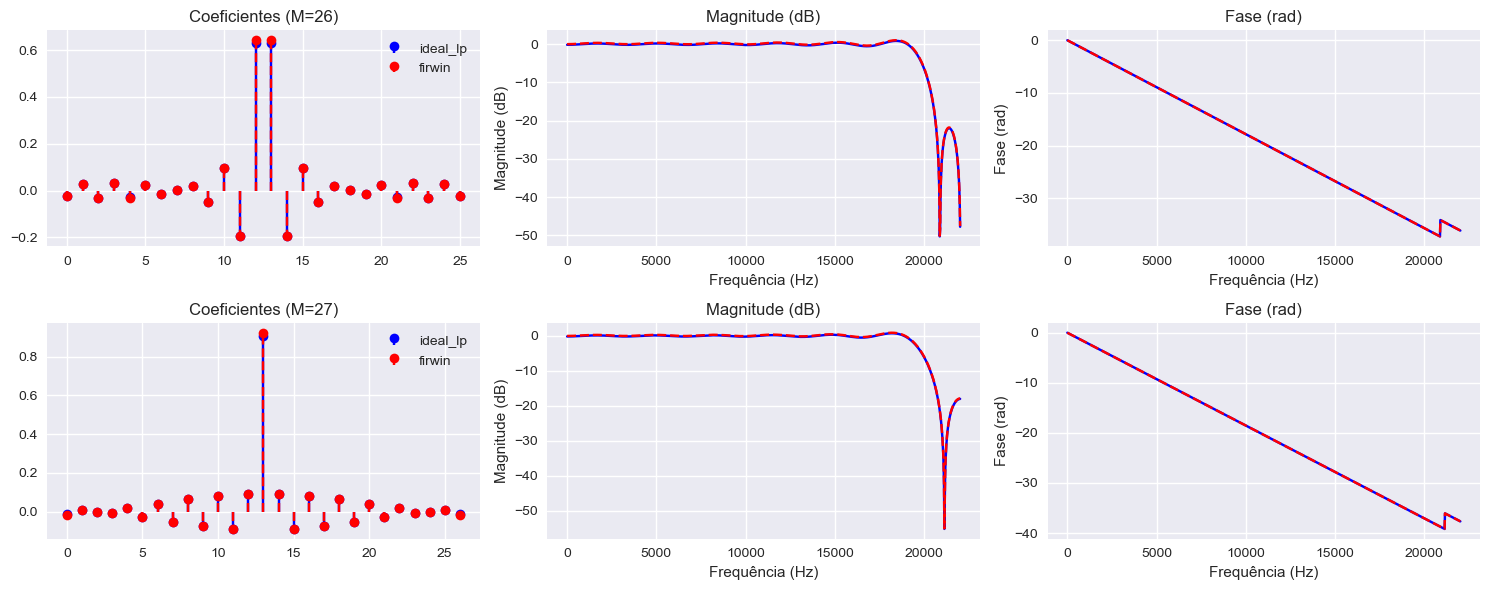

In [9]:
M_values = [26,27]  # Número de coeficientes do filtro
f_c = 20000 # Frequência de corte do filtro
f_s = 44100 # Frequência de amostragem
N_fft = 2048

fig, axes = plt.subplots(len(M_values), 3, figsize=(15, 6))

for i, M in enumerate(M_values):
    # Coeficientes
    h_ideal = ideal_lp(f_c, f_s, M)
    h_firwin = firwin(M, cutoff=f_c, fs=f_s, window="boxcar", pass_zero=True)

    # Erro relativo
    erro = pds.rel_rmse(h_ideal, h_firwin)
    print(f"M = {M}, erro relativo RMSE = {erro:.6e}")

    # Resposta em frequência
    H_ideal = np.fft.fft(h_ideal, N_fft)
    H_firwin = np.fft.fft(h_firwin, N_fft)
    freqs = np.fft.fftfreq(N_fft, d=1/f_s)[:N_fft//2]

    # Plot coeficientes
    ax = axes[i, 0]
    ax.stem(h_ideal, linefmt="b-", markerfmt="bo", basefmt=" ")
    ax.stem(h_firwin, linefmt="r--", markerfmt="ro", basefmt=" ")
    ax.set_title(f"Coeficientes (M={M})")
    ax.legend(["ideal_lp", "firwin"])

    # Plot magnitude da resposta em frequência
    ax = axes[i, 1]
    ax.plot(freqs, 20*np.log10(np.abs(H_ideal[:N_fft//2])+1e-12), "b")
    ax.plot(freqs, 20*np.log10(np.abs(H_firwin[:N_fft//2])+1e-12), "r--")
    ax.set_title("Magnitude (dB)")
    ax.set_xlabel("Frequência (Hz)")
    ax.set_ylabel("Magnitude (dB)")
    ax.grid(True)

    # Plot fase da resposta em frequência
    ax = axes[i, 2]
    ax.plot(freqs, np.unwrap(np.angle(H_ideal[:N_fft//2])), "b")
    ax.plot(freqs, np.unwrap(np.angle(H_firwin[:N_fft//2])), "r--")
    ax.set_title("Fase (rad)")
    ax.set_xlabel("Frequência (Hz)")
    ax.set_ylabel("Fase (rad)")
    ax.grid(True)

plt.tight_layout()
plt.show()